<a href="https://colab.research.google.com/github/jdblackstar/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/122A_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [11]:
# TODO - your code!

# Going to do all of the imports together at the top, even for stuff
# needed below

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chisquare

column_headers = ['party', 'h-infants', 'water-proj', 'budget', 'phys-freeze', 'salvador-aid',
                  'rel-in-schools', 'anti-sat-test', 'nic-contras', 'mx-missile', 'immigration', 'synfuels-cut',
                  'edu-spend', 'sue-perfund', 'crime', 'd-free', 'export-sa']

df = pd.read_csv('house-votes-84.data', names=column_headers)
print(df.shape)
df.head()

(435, 17)


,party,h-infants,water-proj,budget,phys-freeze,salvador-aid,rel-in-schools,anti-sat-test,nic-contras,mx-missile,immigration,synfuels-cut,edu-spend,sue-perfund,crime,d-free,export-sa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [12]:
# We don't like y, n, or ? so I changed them

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

df.head()

,party,h-infants,water-proj,budget,phys-freeze,salvador-aid,rel-in-schools,anti-sat-test,nic-contras,mx-missile,immigration,synfuels-cut,edu-spend,sue-perfund,crime,d-free,export-sa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [13]:
# New dataframe with just sat test vote data

df_sat = df['anti-sat-test']

df_sat.describe()

count    421.000000
mean       0.567696
std        0.495985
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: anti-sat-test, dtype: float64

In [14]:
# dropna so nothing breaks

df_sat = df_sat.dropna()

df_sat.describe()

count    421.000000
mean       0.567696
std        0.495985
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: anti-sat-test, dtype: float64

In [0]:
# confidence interval function

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  marginerr = t*stderr
  return(mean, mean - marginerr, mean + marginerr)

In [17]:
# show the lower and upper bounds, plus the mean of our dataframe, post
# confidence_interval function

mean, lower, upper = confidence_interval(df_sat)

print(mean)
print(lower)
print(upper)

0.5676959619952494
0.5201811192521687
0.6152108047383301


In [18]:
# margin of error

marginerr = upper - mean

marginerr

0.04751484274308071

***Goal 2 - Graphicallt represent the confidence interval***

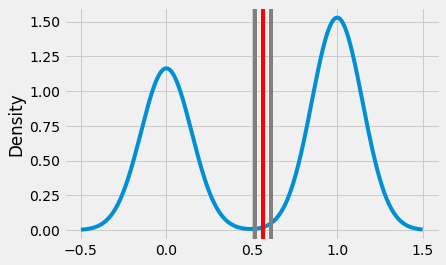

In [31]:
# too lazy to scroll up to import so here it is

import matplotlib.pyplot as plt

sat_confidence = confidence_interval(df_sat)

# trying out the other way to graph stuff, since i used the fig axis method
# on my sprint challenge last week. plus, this seemed to a be a lot easier
# when i didn't need to customize aesthetics of the graph

df_sat.plot.density()
plt.axvline(x = sat_confidence[0], color='red')
plt.axvline(x = sat_confidence[1], color='grey')
plt.axvline(x = sat_confidence[2], color='grey')
plt.show()

***Goal 3 - Interpret the confidence interval - what does it tell you about the data and its distribution***

The confidence interval tells us the likelihood of a specific member of congress voting yes on the sat test proposal (56.7%) plus or minus 4.75%

***Goal 4 - Chi^2 stuff***

In [32]:
# usually import pandas here, but we did that at the top

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", na_values=" ?", 
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                        'hours-per-week', 'native-country', 'income'])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [42]:
# compare observed frequencies of sex and income columns

observed_frequencies = pd.crosstab(df['sex'], df['income'], margins=True)

observed_frequencies

income,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [43]:
row_sums = observed_frequencies.iloc[0:2, 2:].values
row_sums = row_sums.T[0]

row_sums

array([10771, 21790])

In [44]:
col_sums = observed_frequencies.iloc[2:, 0:2].values
col_sums = col_sums[0]

col_sums

array([24720,  7841])

In [45]:
total_total = df.shape[0]

total_total

32561

In [39]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


In [40]:
chi2 = ((observed-expected)**2 / expected).sum()

chi2

1518.8868199570722

In [41]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(chi2)
print(p_value)
print(dof)
print(expected)

1517.813409134445
0.0
1
[[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)